In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,roc_auc_score

In [4]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [30]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
df = df.drop(['CustomerID','Name'],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [33]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [34]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.nunique()

Age                             53
Gender                           2
Location                         5
Subscription_Length_Months      24
Monthly_Bill                  7001
Total_Usage_GB                 451
Churn                            2
dtype: int64

In [58]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

In [37]:
df['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

<Axes: ylabel='Churn'>

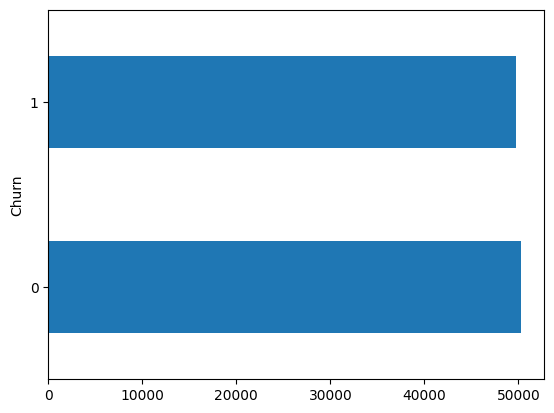

In [11]:
df['Churn'].value_counts().plot(kind='barh')

<Axes: xlabel='Location', ylabel='Subscription_Length_Months'>

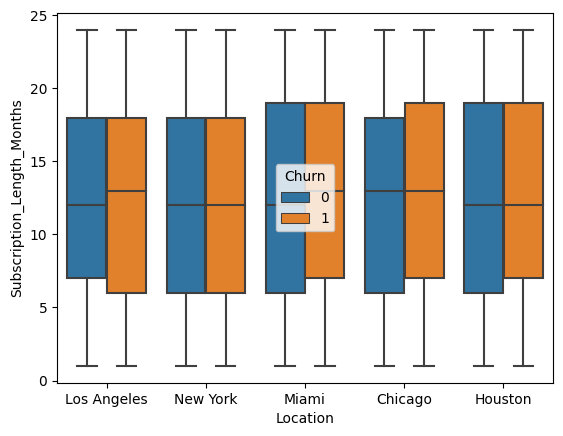

In [38]:
sb.boxplot(x='Location',y='Subscription_Length_Months',hue='Churn',data=df)

<Axes: xlabel='Location', ylabel='Monthly_Bill'>

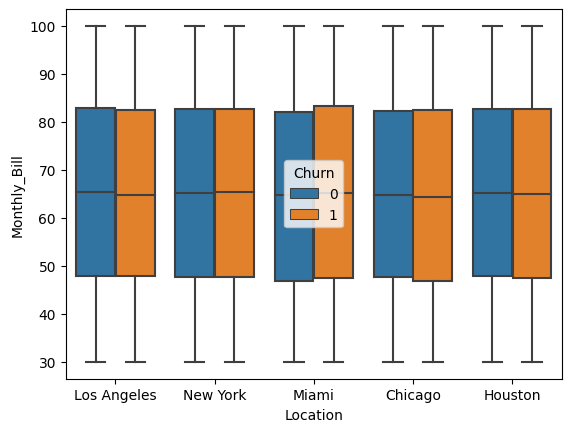

In [13]:
sb.boxplot(x='Location',y='Monthly_Bill',hue='Churn',data=df)

<Axes: xlabel='Location', ylabel='Total_Usage_GB'>

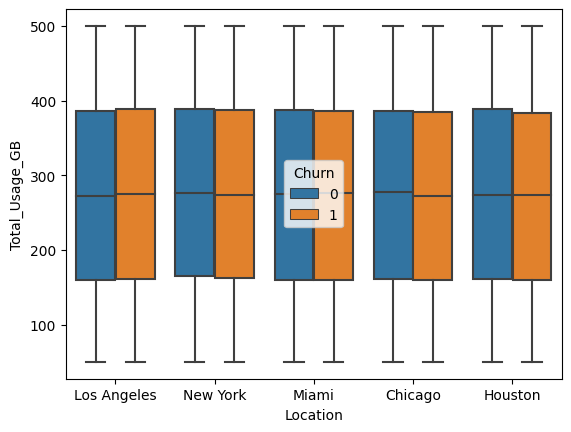

In [39]:
sb.boxplot(x='Location',y='Total_Usage_GB',hue='Churn',data=df)

<Axes: xlabel='Gender', ylabel='Monthly_Bill'>

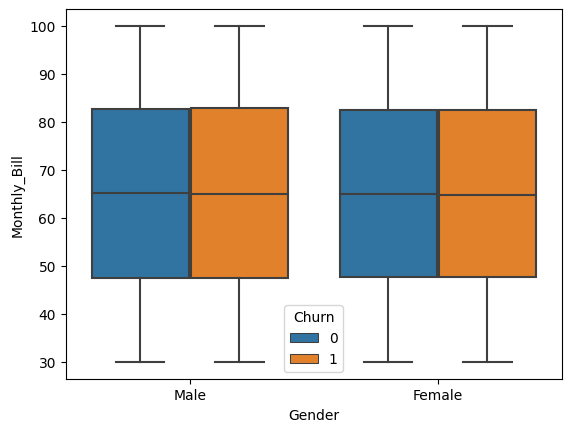

In [15]:
sb.boxplot(x='Gender',y='Monthly_Bill',hue='Churn',data=df)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Subscription_Length_Months'}>],
       [<Axes: title={'center': 'Monthly_Bill'}>,
        <Axes: title={'center': 'Total_Usage_GB'}>]], dtype=object)

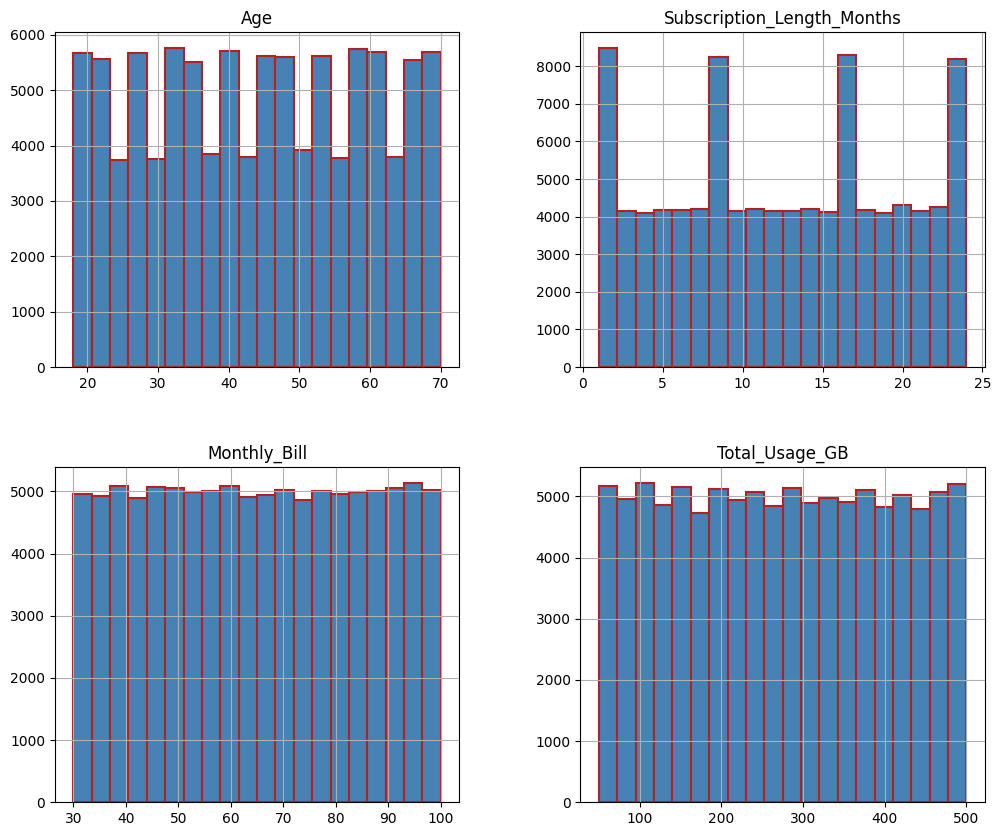

In [40]:
col=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
df[col].hist(figsize=(12, 10),bins=20,layout=(2, 2),color='steelblue',edgecolor='firebrick',linewidth=1.5)

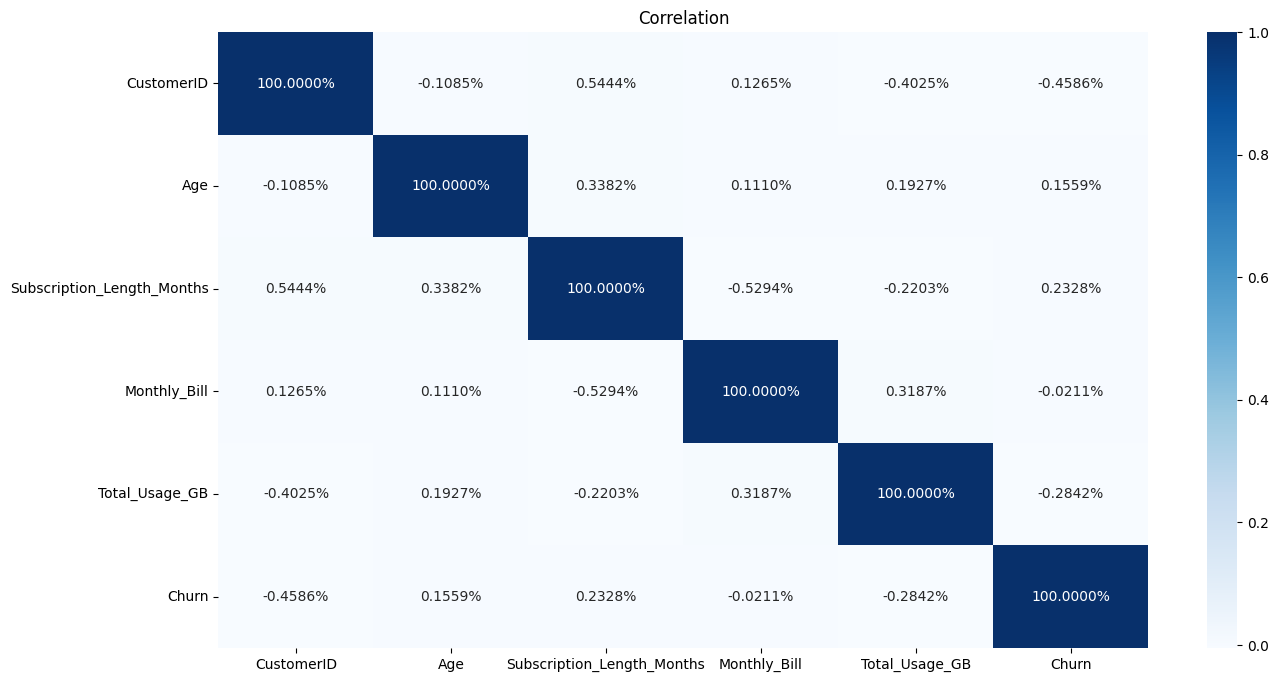

In [17]:
plt.figure(figsize=(15,8))
sb.heatmap(df.corr(numeric_only= True), cmap='Blues',fmt='.4%', annot=True)
plt.title('Correlation')
plt.show()

In [6]:
X =df.drop('Churn',axis=1)
Y = df['Churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 6) (20000, 6) (80000,) (20000,)


In [8]:
label_encoder = preprocessing.LabelEncoder()

X_train['Gender']= label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])


X_train['Location']= label_encoder.fit_transform(X_train['Location'])
X_test['Location'] = label_encoder.transform(X_test['Location'])
X_test

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
33909,38,0,2,2,63.55,347
92307,64,0,3,5,48.97,98
89107,35,0,4,11,50.95,284
9538,63,1,0,11,48.17,221
31008,44,0,2,1,53.50,467
...,...,...,...,...,...,...
34823,37,0,2,3,85.85,441
78045,39,0,4,23,53.81,253
73770,22,0,1,12,49.40,436
78950,61,0,0,12,98.28,447


In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_train_data = scale.fit_transform(X_train)

scaled_test_data = scale.transform(X_test)
scaled_train_data

array([[ 4.55411390e-01, -9.96431368e-01, -2.92172273e-04,
        -5.05251775e-01, -1.69435647e+00,  5.32049870e-01],
       [ 4.55411390e-01, -9.96431368e-01,  7.08004248e-01,
         5.06400724e-01,  7.90300797e-01, -5.93356780e-01],
       [-1.32855080e-01,  1.00358141e+00, -7.08588593e-01,
        -6.49773561e-01,  1.77353959e-02, -8.15375779e-01],
       ...,
       [-1.98218021e-01,  1.00358141e+00,  1.41630067e+00,
         1.37353144e+00, -6.57024411e-01, -4.97930239e-02],
       [ 1.93959626e-01,  1.00358141e+00,  7.08004248e-01,
         7.28353669e-02, -1.37864413e-01,  9.56676996e-02],
       [-3.28943903e-01,  1.00358141e+00,  7.08004248e-01,
        -3.60729990e-01, -1.65483906e+00, -9.76148158e-01]])

In [10]:
scaled_test_data

array([[-3.94306844e-01, -9.96431368e-01, -2.92172273e-04,
        -1.51690427e+00, -7.41425866e-02,  5.55017353e-01],
       [ 1.30512962e+00, -9.96431368e-01,  7.08004248e-01,
        -1.08333892e+00, -7.94347417e-01, -1.35128371e+00],
       [-5.90395668e-01, -9.96431368e-01,  1.41630067e+00,
        -2.16208204e-01, -6.96541823e-01,  7.27002169e-02],
       ...,
       [-1.44011390e+00, -9.96431368e-01, -7.08588593e-01,
        -7.16864187e-02, -7.73106808e-01,  1.23638600e+00],
       [ 1.10904080e+00, -9.96431368e-01, -1.41688501e+00,
        -7.16864187e-02,  1.64140705e+00,  1.32060011e+00],
       [ 8.47589037e-01,  1.00358141e+00, -1.41688501e+00,
        -1.51690427e+00,  1.71500823e+00, -1.71876343e+00]])


# Logistic Regression

In [47]:
# Bulding the Model
classifier_lr = LogisticRegression(random_state=0)
# Training the Model
classifier_lr.fit(scaled_train_data, y_train)

LogisticRegression(random_state=0)

In [48]:
# Making the Prediction
y_pred = classifier_lr.predict(scaled_test_data)

In [49]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
# Getting the Results

results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec,roc_auc]],columns = ["Model", "accuracy", "f1", "precision", "recall","Roc_auc"])

results

,Model,accuracy,f1,precision,recall,Roc_auc
0,Logistic Regression,0.5007,0.307009,0.506874,0.220187,0.501996


LogisticRegression Confusion matrix


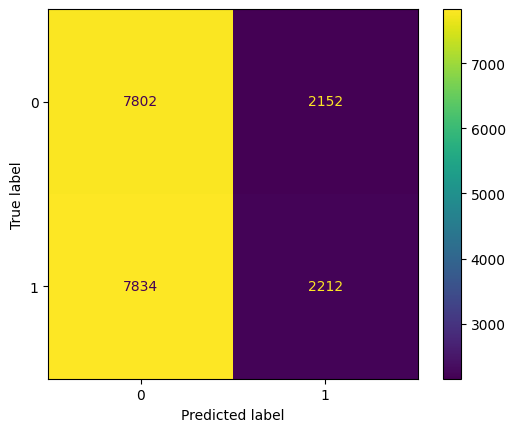

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_metric =confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_metric)
print('LogisticRegression Confusion matrix')
disp.plot()
plt.show()


In [63]:
# Cross Validation

accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

accuracies

array([0.506625, 0.504875, 0.504875, 0.497875, 0.505125, 0.503625,
       0.496625, 0.503125, 0.4895  , 0.502625])

In [64]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 50.15%
Standard Deviation is 0.50%


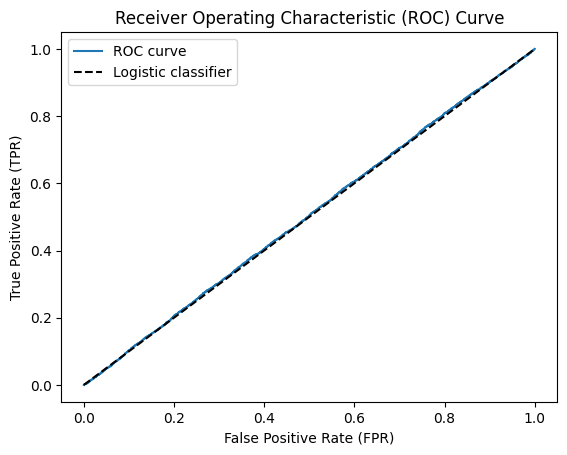

In [89]:
from sklearn.metrics import roc_curve
y_pred = classifier_lr.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest Classifier

In [14]:
# Bulding the Model
classifier_rm = RandomForestClassifier(random_state=0)
# Training the Model
classifier_rm.fit(scaled_train_data, y_train)

RandomForestClassifier(random_state=0)

In [15]:
# Making the Prediction

y_pred_rf= classifier_rm.predict(scaled_test_data)


In [68]:
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test , y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
# Getting the Results

model_results = pd.DataFrame([['Random Forest', acc_rf, f1_rf, prec_rf, rec_rf,roc_auc_rf]],columns=["Model", "accuracy", "f1", "precision", "recall","Roc_auc"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall,Roc_auc
0,Logistic Regression,0.50070,0.307009,0.506874,0.220187,0.501996
1,Random Forest,0.49735,0.482737,0.499627,0.466952,0.497490


Random Forest Confusion matrix


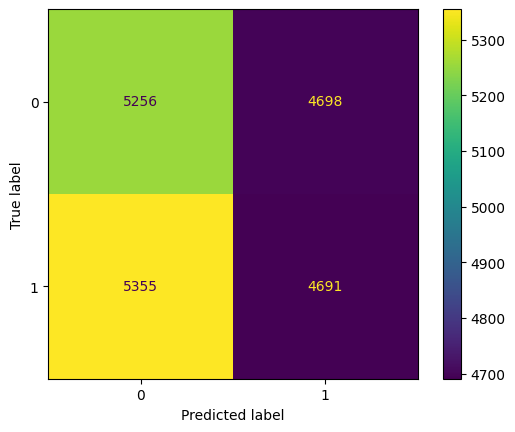

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_metric_rf =confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_metric_rf)
print('Random Forest Confusion matrix')
disp.plot()
plt.show()


In [70]:
# Cross Validation

accuracies = cross_val_score(estimator=classifier_rm, X=X_train, y=y_train, cv=10)

accuracies

array([0.493125, 0.495625, 0.500875, 0.503125, 0.495875, 0.49075 ,
       0.4965  , 0.489125, 0.49625 , 0.495625])

In [71]:


print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))



Accuracy is 49.57%
Standard Deviation is 0.40%


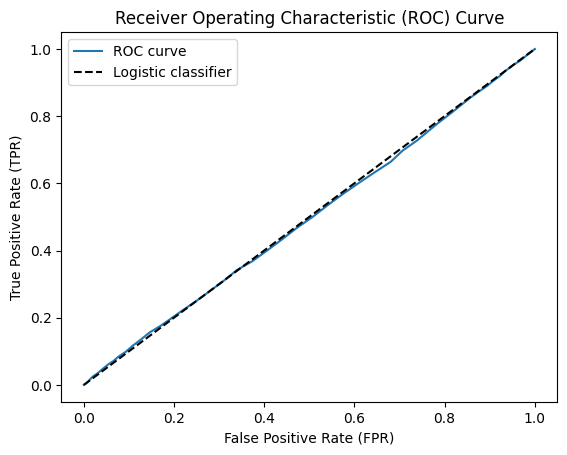

In [92]:
from sklearn.metrics import roc_curve
y_pred_rf = classifier_rm.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# XGBoost Classifier

In [11]:
# Bulding the Model


classifier_xgb = XGBClassifier()
# Training the Model

classifier_xgb.fit(scaled_train_data, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# Making the Prediction

y_pred_xg = classifier_xgb.predict(scaled_test_data)
acc_xg = accuracy_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)
prec_xg = precision_score(y_test, y_pred_xg)
rec_xg = recall_score(y_test, y_pred_xg)
roc_auc_xg = roc_auc_score(y_test, y_pred_xg)
# Getting the Results

model_results = pd.DataFrame([['XGBoost', acc_xg, f1_xg, prec_xg, rec_xg,roc_auc_xg]],columns = ["Model", "accuracy", "f1", "precision", "recall","Roc_auc"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall,Roc_auc
0,Logistic Regression,0.50070,0.307009,0.506874,0.220187,0.501996
1,Random Forest,0.49735,0.482737,0.499627,0.466952,0.497490
2,XGBoost,0.50165,0.483655,0.504267,0.464663,0.501821


Random Forest Confusion matrix


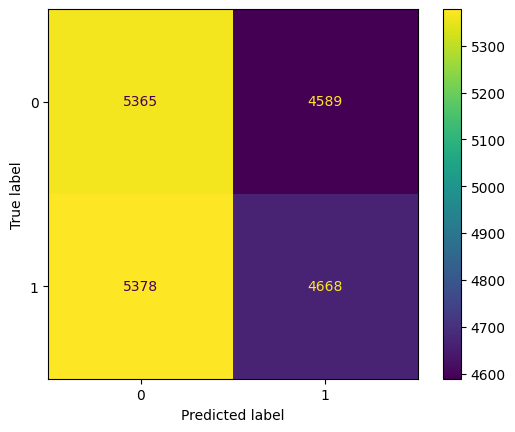

In [74]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_metric_xg =confusion_matrix(y_test, y_pred_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_metric_xg)
print('Random Forest Confusion matrix')
disp.plot()
plt.show()


In [75]:
# Cross Validation


accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)

accuracies

array([0.498   , 0.5055  , 0.498875, 0.508125, 0.497   , 0.5065  ,
       0.510375, 0.4995  , 0.496125, 0.497125])

In [ ]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 50.18%
Standard Deviation is 0.72%


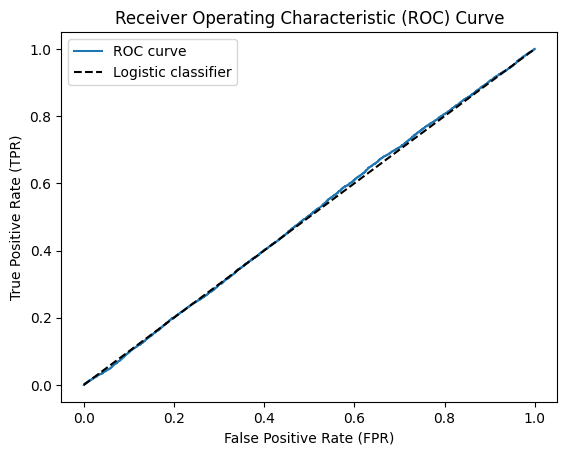

In [94]:
from sklearn.metrics import roc_curve
y_pred_xg = classifier_xgb.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'max_features': ['sqrt'],  # Set max_features explicitly to 'sqrt'
}

In [17]:
random_search = RandomizedSearchCV(estimator=classifier_rm,
                                   param_distributions=parameters,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=3)

In [18]:
random_search.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [80]:
random_search.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=15,
                       random_state=0)

In [81]:
random_search.best_score_

0.5048618611322901

In [82]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': True}

In [83]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=300, random_state=0)

classifier.fit(scaled_train_data, y_train)

RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=300, random_state=0)

In [84]:
# Loading the Metrics

y_pred_rfc = classifier.predict(scaled_test_data)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
prec_rfc = precision_score(y_test, y_pred_rfc)
rec_rfc = recall_score(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rfc)


In [85]:
# Evaluating with Adjusted Parameters

model_results = pd.DataFrame([['Random Forest Final', acc_rfc, f1_rfc, prec_rfc, rec_rfc,roc_auc_rfc]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall","Roc_auc"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall,Roc_auc
0,Logistic Regression,0.50070,0.307009,0.506874,0.220187,0.501996
1,Random Forest,0.49735,0.482737,0.499627,0.466952,0.497490
2,XGBoost,0.50165,0.483655,0.504267,0.464663,0.501821
3,Random Forest Final,0.50155,0.421852,0.505349,0.362035,0.502195


Random Forest Confusion matrix


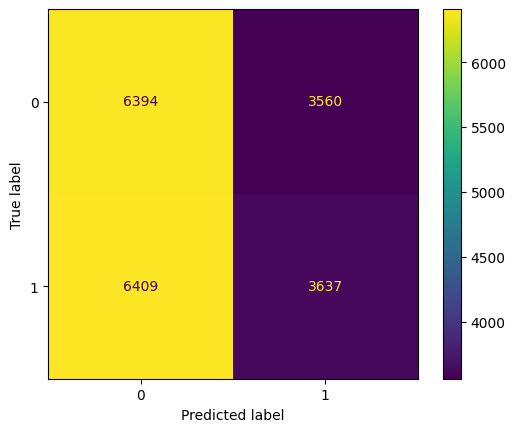

In [86]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_metric_rfc =confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_metric_rfc)
print('Random Forest Confusion matrix')
disp.plot()
plt.show()


In [87]:
# Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
accuracies

array([0.5064375, 0.4994375, 0.4990625, 0.5096875, 0.5021875])

In [88]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 50.34%
Standard Deviation is 0.41%


# feature importance

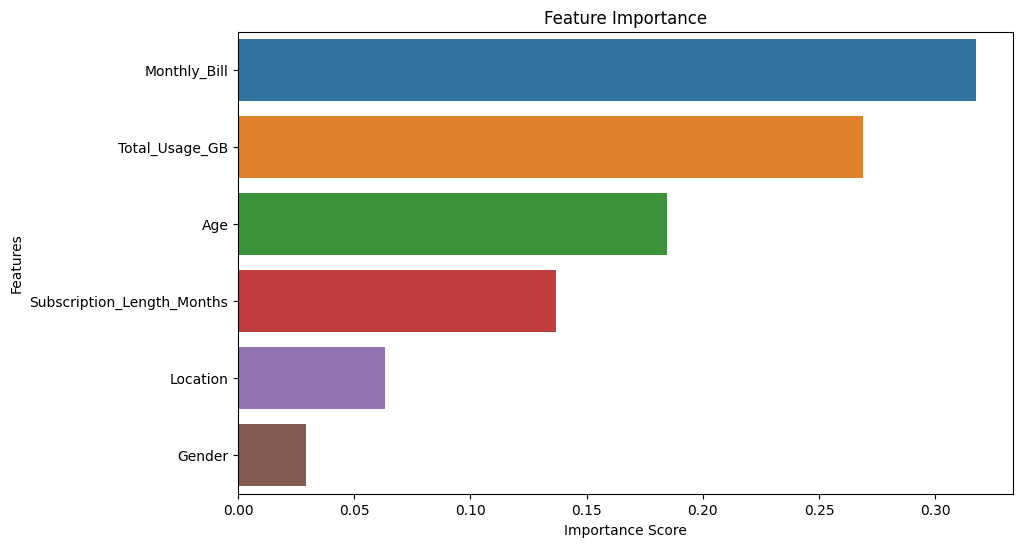

In [19]:
from sklearn.feature_selection import RFE
num_features =6
importance_scores = random_search.best_estimator_.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()